In [1]:
import sys
sys.path.append('../')
sys.path.append('/home/airplaneless/source/box-convolutions/')

PIC_DIR = './pics_boxenet_dice'

import os
import cv2
import torch
import torch.nn
import torch.utils.data
import numpy as np
import matplotlib
import pylab as plt
import pandas as pd

from tqdm import tqdm
from src.utils import H18train_set, imshow, H18test_set
from src.utils import predictEllipseValues

In [2]:
plt.style.use('dark_background')

In [3]:
def f(x,y, h=0, k=0, A=0, a=10, b=10):
    xpart = (x - h) * np.cos(A) + (y - k) * np.sin(A)
    ypart = (x - h) * np.sin(A) - (y - k) * np.cos(A)
    res = np.power(xpart, 2) / np.power(a,2) + np.power(ypart, 2) / np.power(b,2)
    return res

In [4]:
model = torch.load('../workspace/saved_models/enet_dice.pt')
dataset = H18test_set('../dataset/')
testdata = torch.utils.data.DataLoader(dataset, batch_size=1)

In [5]:
it = iter(testdata)

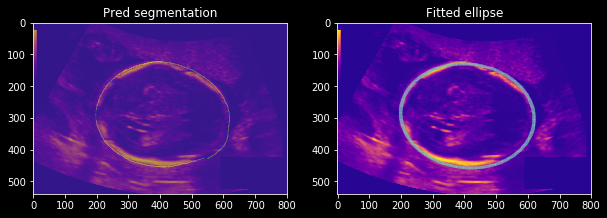

In [6]:
from matplotlib import cm

img, _ = next(it)
pred = model(img.cuda())

params = predictEllipseValues(img.cuda(), model)
x, y = np.meshgrid(np.arange(0,800), np.arange(0,540))
z = f(x, y, A=params[1], h=params[0][0], k=params[0][1], a=params[2][0], b=params[2][1])
z[np.where(z < 1 - 5e-2)] = 0
z[np.where(z > 1 + 5e-2)] = 0
z[np.where(z != 0)] = 1
yz, xz = np.where(z==1)

mask = pred.cpu().detach().numpy()[0,0]
image = img.cpu().detach().numpy()[0,0]
mask = cv2.resize(mask, dsize=(800, 540), interpolation=cv2.INTER_CUBIC)
image = cv2.resize(image, dsize=(800, 540), interpolation=cv2.INTER_CUBIC)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].set_title('Pred segmentation')
ax[0].imshow(image, cmap=cm.plasma)
ax[0].imshow(mask, alpha=0.4)
ax[1].set_title('Fitted ellipse')
ax[1].imshow(image, cmap=cm.plasma)
ax[1].scatter(xz, yz, s=1e-2, alpha=0.4)
plt.show()

In [7]:
if not os.path.exists(PIC_DIR):
    os.mkdir(PIC_DIR)

In [8]:
for batch in tqdm(testdata):
    img, fname = batch
    pred = model(img.cuda())

    params = predictEllipseValues(img.cuda(), model)
    x, y = np.meshgrid(np.arange(0,800), np.arange(0,540))
    z = f(x, y, A=params[1], h=params[0][0], k=params[0][1], a=params[2][0], b=params[2][1])
    z[np.where(z < 1 - 5e-2)] = 0
    z[np.where(z > 1 + 5e-2)] = 0
    z[np.where(z != 0)] = 1
    yz, xz = np.where(z==1)

    mask = pred.cpu().detach().numpy()[0,0]
    image = img.cpu().detach().numpy()[0,0]
    mask = cv2.resize(mask, dsize=(800, 540), interpolation=cv2.INTER_CUBIC)
    image = cv2.resize(image, dsize=(800, 540), interpolation=cv2.INTER_CUBIC)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))

    ax[0].set_title('Pred segmentation')
    ax[0].imshow(image, cmap=cm.plasma)
    ax[0].imshow(mask, alpha=0.4)
    ax[1].set_title('Fitted ellipse')
    ax[1].imshow(image, cmap=cm.plasma)
    ax[1].scatter(xz, yz, s=1e-2, alpha=0.4)
    plt.savefig('{}/{}'.format(PIC_DIR, fname[0]))
    plt.close()

  4%|▍         | 15/335 [00:10<03:45,  1.42it/s]../src/utils.py:221: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
 38%|███▊      | 128/335 [01:52<02:38,  1.30it/s]../src/utils.py:222: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
100%|██████████| 335/335 [05:01<00:00,  1.04it/s]
